<a href="https://colab.research.google.com/github/prateeksrivastava07/NN-and-CNN/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


In [ ]:
data=tf.keras.datasets.cifar100

In [ ]:
(xtr,ytr),(xtst,ytst)=data.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
xtr.shape

(50000, 32, 32, 3)

In [ ]:
xtst.shape

(10000, 32, 32, 3)

In [ ]:
ytr.shape

(50000, 1)

In [ ]:
ytst.shape

(10000, 1)

In [ ]:
ytst[:5]

array([[49],
       [33],
       [72],
       [51],
       [71]])

In [ ]:
ytr=ytr.reshape(-1,)
ytst=ytst.reshape(-1,)

In [ ]:
ytst[:5]

array([49, 33, 72, 51, 71])

In [ ]:
ytst[0]

49

In [ ]:
xtr=xtr/255
xtst=xtst/255

In [ ]:
cn=['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

Text(0.5, 0, 'spider')

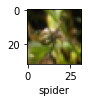

In [ ]:
plt.figure(figsize=(15,1))
plt.imshow(xtst[8000])
plt.xlabel(cn[ytst[8000]])

In [ ]:
model=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',padding='same'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1000,activation='relu'),
#tf.keras.layers.Dropout(.20),
tf.keras.layers.Dense(100,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
model.fit(xtr,ytr,epochs=10,batch_size=20)

Epoch 1/10
2500/2500 [==============================] - 23s 9ms/step - loss: 3.8429 - acc: 0.1055
Epoch 2/10
2500/2500 [==============================] - 22s 9ms/step - loss: 3.0345 - acc: 0.2474
Epoch 3/10
2500/2500 [==============================] - 22s 9ms/step - loss: 2.6263 - acc: 0.3274
Epoch 4/10
2500/2500 [==============================] - 21s 9ms/step - loss: 2.3382 - acc: 0.3865
Epoch 5/10
2500/2500 [==============================] - 21s 8ms/step - loss: 2.0961 - acc: 0.4372
Epoch 6/10
2500/2500 [==============================] - 21s 8ms/step - loss: 1.8646 - acc: 0.4891
Epoch 7/10
2500/2500 [==============================] - 21s 8ms/step - loss: 1.6503 - acc: 0.5422
Epoch 8/10
2500/2500 [==============================] - 21s 8ms/step - loss: 1.4442 - acc: 0.5880
Epoch 9/10
2500/2500 [==============================] - 21s 8ms/step - loss: 1.2542 - acc: 0.6357
Epoch 10/10
2500/2500 [==============================] - 21s 8ms/step - loss: 1.0840 - acc: 0.6785


In [ ]:
model.evaluate(xtst,ytst)

313/313 [==============================] - 2s 6ms/step - loss: 3.3560 - acc: 0.3482


[3.3560428619384766, 0.3481999933719635]

In [ ]:
model.save('CIFAR100.h5')